<a href="https://colab.research.google.com/github/baba410/1082python/blob/master/%E7%94%A8%E7%85%A7%E7%89%87%E3%80%81%E6%8F%8F%E8%BF%B0%E3%80%81%E9%A1%8F%E8%89%B2%E9%A0%90%E6%B8%ACtwitter%E4%BD%BF%E7%94%A8%E8%80%85%E6%80%A7%E5%88%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
from google.colab import drive
drive.mount('/content/drive/')

path = "/content/drive/My Drive/Colab Notebooks/"

os.chdir(path)
os.listdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['Untitled0.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled3.ipynb',
 'Untitled4.ipynb',
 'Untitled5.ipynb',
 '0428 (1).ipynb',
 '0428.ipynb',
 'Untitled',
 'Untitled6.ipynb',
 'for 八澤.ipynb',
 'Untitled7.ipynb',
 '2train_test_data.pickle',
 'model.png',
 'weights-01-75.42.hdf5',
 'for_八澤.ipynb']

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving 2train_test_data.pickle to 2train_test_data (1).pickle


In [0]:
import tensorflow as tf

In [0]:
import pickle

In [0]:
with open('2train_test_data.pickle','rb') as file:
    dic = pickle.load(file)

In [0]:
inputa  = dic['inputa'].astype(np.float32)
inputa2 = dic['inputa2'].astype(np.float32)
inputb  = dic['inputb'].astype(np.float32)
inputb2 = dic['inputb2'].astype(np.float32)
inputc  = dic['inputc'].astype(np.float32)
inputc2 = dic['inputc2'].astype(np.float32)
y_train = dic['y_train'].astype(np.float32)
y_test  = dic['y_test'].astype(np.float32)

In [0]:
dic['inputb'].shape

(8955, 6)

In [0]:
from tensorflow.keras.utils import to_categorical
y_train_ = to_categorical(y_train)
y_test_ = to_categorical(y_test)

In [0]:
y_train_.shape

(8955, 2)

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GRU, Embedding, Flatten, concatenate, Input
#Dense for NN, Conv2d Maxpool2d Flatten for CNN , GRU Embedding for RNN , Input concatenate for functional API
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout, SpatialDropout1D, Reshape, Add, Activation, RepeatVector

In [0]:
from tensorflow.keras.layers import BatchNormalization, ReLU, AveragePooling1D

In [0]:
from tensorflow.keras.layers import LSTM

In [0]:
from tensorflow.keras import regularizers

In [0]:
def resnet_block_CNN(layer, output_dim=256):
  layer = BatchNormalization()(layer)
  layer_ = Reshape((16,16,30,))(layer)
  layer_ = Conv2D(64 ,(2,2), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01))(layer_)
  layer_ = Flatten()(layer_)
  layer_ = Dense(output_dim, activation='relu',kernel_regularizer=regularizers.l2(0.01))(layer_)
  layer_ = BatchNormalization()(layer_)
  layer = Add()([layer,layer_])
  layer = ReLU()(layer)
  return layer
def resnet_block_NN(layer, output_dim=256, input_dim=256):
  layer = BatchNormalization()(layer)
  layer_ = Dense(units=output_dim, activation='relu',kernel_regularizer=regularizers.l2(0.01))(layer)
  layer_ = BatchNormalization()(layer_)

  layer = Reshape((input_dim,1,))(layer)
  layer = AveragePooling1D(int(input_dim/output_dim), padding='valid')(layer)
  layer = Flatten()(layer)
  layer = BatchNormalization()(layer)
  layer = Add()([layer,layer_])
  layer = ReLU()(layer)
  return layer

In [0]:
# build RNN
InputA = Input(shape=(30,))
a = Embedding(10000,256)(InputA)
a1 = resnet_block_CNN(a)
a1 = resnet_block_CNN(a1)
a1 = resnet_block_CNN(a1)
a1 = resnet_block_CNN(a1)
a1 = BatchNormalization()(a1)

a2 = LSTM(256)(a)
a2 = resnet_block_NN(a2)
a2 = resnet_block_NN(a2)
a2 = resnet_block_NN(a2)
a2 = resnet_block_NN(a2)
a2 = resnet_block_NN(a2)
a2 = resnet_block_NN(a2)
a2 = resnet_block_NN(a2)
a2 = resnet_block_NN(a2)
a2 = resnet_block_NN(a2)
a2 = BatchNormalization()(a2)
a = Add()([a1,a2])
a = ReLU()(a)
a = Flatten()(a)
a = Dense(256, activation='relu')(a)
a = BatchNormalization()(a)
a = Model(inputs=InputA , outputs=a)

In [0]:
# build NN
InputB = Input(6,)
b = Embedding(256,16)(InputB)
b = LSTM(256)(b)
b = resnet_block_NN(b)
b = resnet_block_NN(b)
b = Dense(256, activation='relu')(b)
b = BatchNormalization()(b)
b = Model(inputs=InputB, outputs=b)

In [0]:
# build CNN
def CNN1(inputimg,out_dim):
  cinput = Activation('relu')(inputimg)
  c1 = Conv2D(out_dim/8, (1,1), padding='same', activation = 'relu',kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01))(cinput)
  c1 = Conv2D(out_dim/4, (3,3), padding='same', activation = 'relu',kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01))(cinput)

  c2 = Conv2D(out_dim/4, (1,1), padding='same', activation = 'relu',kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01))(cinput)

  c3 = Conv2D(out_dim/2, (1,1), padding='same', activation = 'relu',kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01))(cinput)
  c3 = Conv2D(out_dim/4, (5,5), padding='same', activation = 'relu',kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01))(c3)

  c4 = MaxPooling2D(pool_size=(3,3), strides=1 ,padding='same')(cinput)
  c4 = Conv2D(out_dim/4, (1,1), padding='same', activation = 'relu',kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01))(c4)
  
  c1234 = concatenate([c1, c2, c3, c4], axis=3)
  c1234 = BatchNormalization()(c1234)
  c1234 = ReLU()(c1234)
  cinput = Conv2D(out_dim, (1,1), padding='same', activation='linear')(cinput)
  cinput = BatchNormalization()(cinput)
  c5 = Add()([c1234, cinput])
  c5 = Activation('relu')(c5)
  return c5

InputC = Input(shape=(48,48,3,))
c = CNN1(InputC, 32)
c = CNN1(c,64)
c = CNN1(c,64)
c = CNN1(c,64)
c = Flatten()(c)
c = Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01))(c)
c = BatchNormalization()(c)
c = Model(inputs=InputC, outputs=c)

In [0]:
addab = Add()([a.output, b.output])
ab = Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01))(addab)
ab = BatchNormalization()(ab)
ab = ReLU()(ab)

addac = Add()([a.output, c.output])
ac = Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01))(addac)
ac = BatchNormalization()(ac)
ac = ReLU()(ac)

addbc = Add()([b.output, c.output])
bc = Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01))(addbc)
bc = BatchNormalization()(bc)
bc = ReLU()(bc)

addabc = Add()([a.output, b.output, c.output])
abc = Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01))(addabc)
abc = BatchNormalization()(abc)
abc = ReLU()(abc)

In [0]:
added_ = Add()([a.output, b.output, c.output, ab, bc, ac, abc])
e = Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01))(added_)
e = resnet_block_NN(e)
e = Dropout(0.2)(e)
e = resnet_block_NN(e)
e = resnet_block_NN(e)
e = Dropout(0.2)(e)
e = resnet_block_NN(e)
e = resnet_block_NN(e)
e = resnet_block_NN(e)
e = resnet_block_NN(e)
e = Dense(2, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(e)
model = Model(inputs=[InputA, InputB, InputC], outputs=e)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [0]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 256)      2560000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 256)          525312      embedding[0][0]                  
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 256)          1024        lstm[0][0]                       
____________________________________________________________________________________________

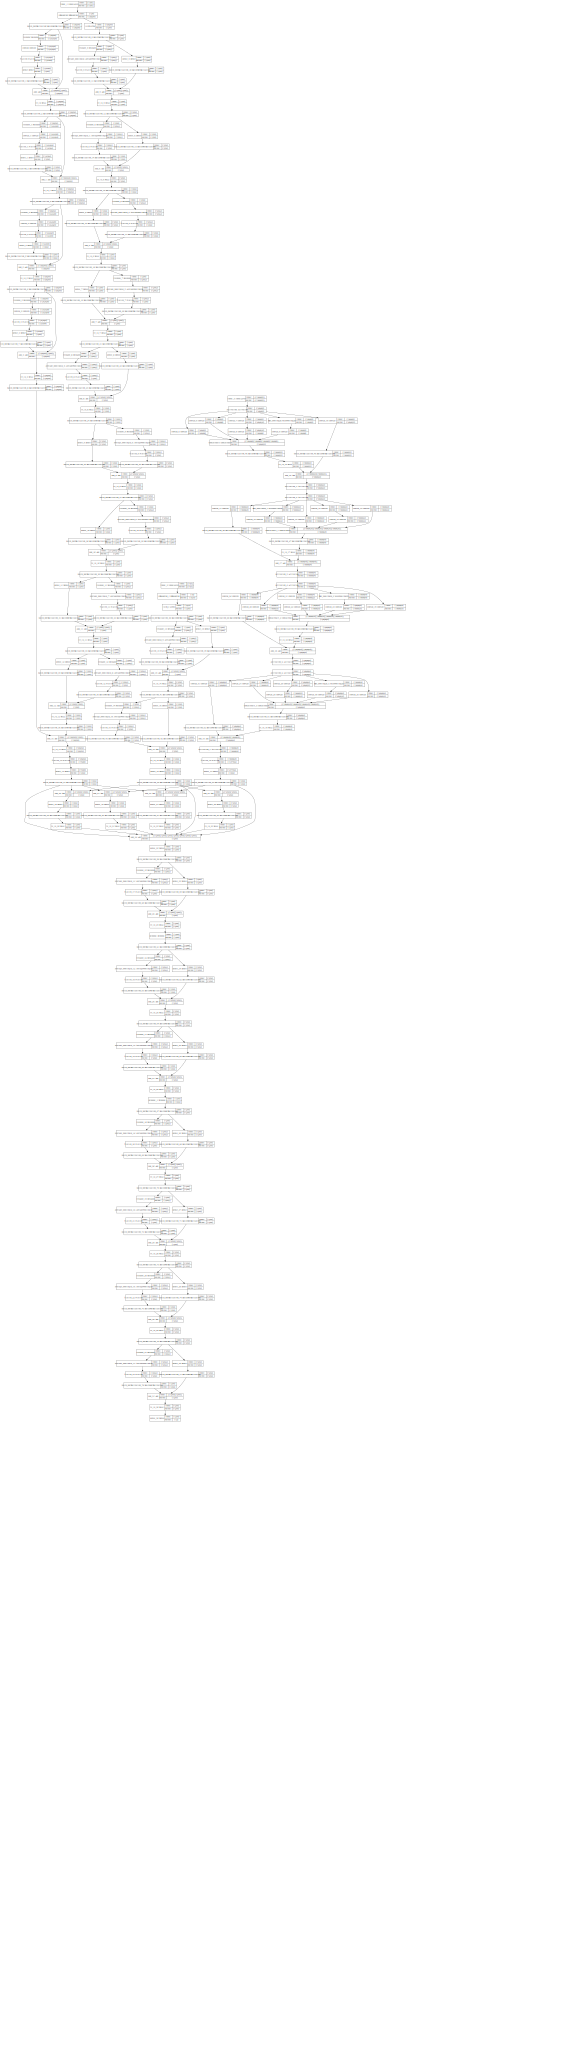

In [0]:
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG
plot_model(model,show_shapes=True, to_file='model.png')
SVG(model_to_dot(model,show_shapes=True, dpi=50).create(prog='dot', format='svg'))

In [0]:
filepath="weights-{epoch:02d}-{val_loss:.2f}.hdf5"
mycallback = [tf.keras.callbacks.History(),
              tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1),
              tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)]
history = model.fit([inputa, inputb, inputc], y_train_, batch_size=256, epochs=20,
                    callbacks = mycallback,
          validation_data=(([inputa2, inputb2, inputc2], y_test_)))

Epoch 1/20
35/35 [==============================] - 921s 26s/step - loss: 82.5908 - accuracy: 0.5147 - val_loss: 75.3098 - val_accuracy: 0.5132
Epoch 2/20
35/35 [==============================] - 923s 26s/step - loss: 67.5019 - accuracy: 0.5178 - val_loss: 59.3332 - val_accuracy: 0.4944
Epoch 3/20
35/35 [==============================] - 928s 27s/step - loss: 52.6390 - accuracy: 0.5223 - val_loss: 46.0402 - val_accuracy: 0.4944
Epoch 4/20
35/35 [==============================] - 935s 27s/step - loss: 40.8286 - accuracy: 0.5284 - val_loss: 35.7422 - val_accuracy: 0.4944
Epoch 5/20
35/35 [==============================] - 930s 27s/step - loss: 31.7887 - accuracy: 0.5275 - val_loss: 27.9423 - val_accuracy: 0.4944
Epoch 6/20
35/35 [==============================] - 937s 27s/step - loss: 24.9189 - accuracy: 0.5423 - val_loss: 21.9713 - val_accuracy: 0.4944
Epoch 7/20
35/35 [==============================] - 959s 27s/step - loss: 19.6339 - accuracy: 0.5479 - val_loss: 17.3596 - val_accuracy:

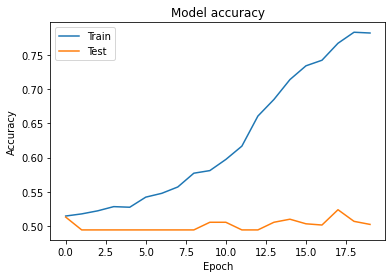

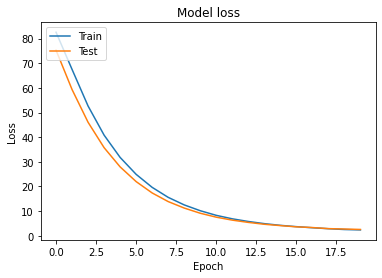

In [0]:
import matplotlib.pyplot as plt

# 绘制训练 & 验证的准确率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
list(y_train).count(0)/len(y_train)

In [0]:
list(y_test).count(0)/len(y_test)

In [0]:
model.save('p_2_516006.h5')

In [0]:
##期中提案及影片：陳政澤
##整理kaggle資料：許書睿、邱晨愷
##用CNN建立model 、 testing與校正：張宇沛、許書睿、邱晨愷、陳政澤

In [0]:
##針對圖片用CNN，描述用RNN，顏色用NN